## Titanic survival prediction-Codsoft task 1

In [160]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, classification_report


In [127]:
titanic =pd.read_csv("C:\\Users\\prasanna\\OneDrive\\Desktop\\5thsem\\datasets(codsoft)\\tested.csv")

In [128]:
titanic.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S


In [129]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### data visualization

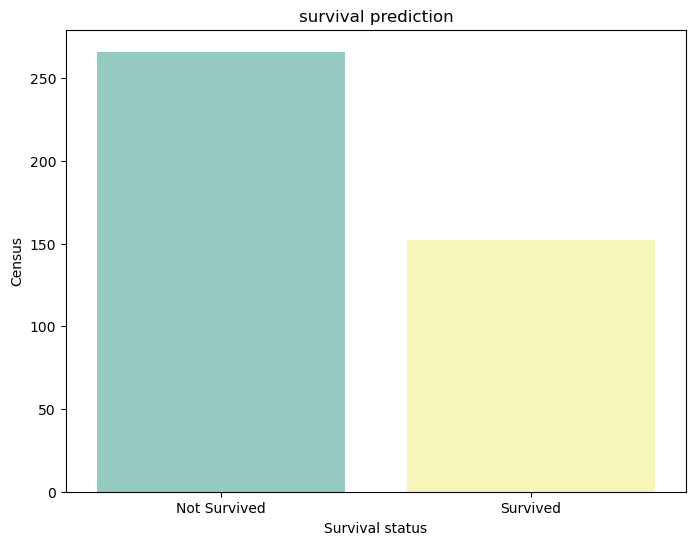

In [130]:
# visualizing survived and non survived passengers
plt.figure(figsize=(8, 6))
colors=['red','green','blue']
sns.countplot(data=titanic, x='Survived', palette="Set3")
plt.title("survival prediction")
plt.xlabel("Survival status")
plt.xticks([0, 1], ["Not Survived", "Survived"])
plt.ylabel("Census")
plt.show()



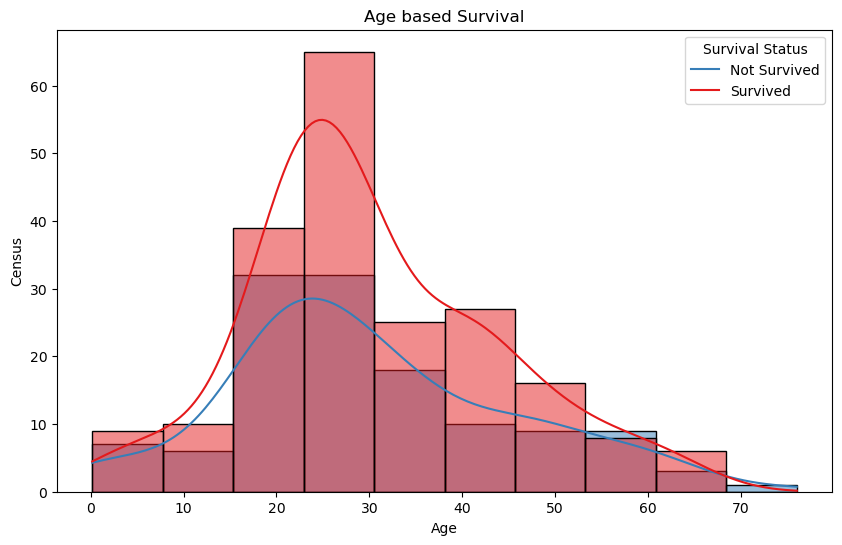

In [131]:
#age group that has survived
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='Age', hue='Survived', bins=10, kde=True, palette="Set1")
plt.title("Age based Survival")
plt.xlabel("Age")
plt.ylabel("Census")
plt.legend(title='Survival Status', labels=['Not Survived', 'Survived'])
plt.show()


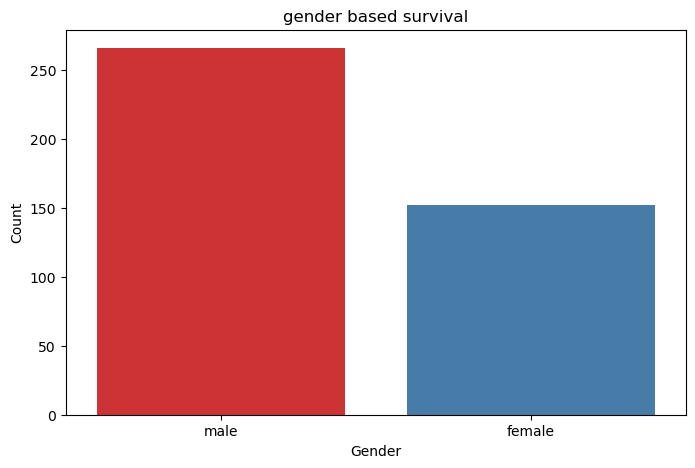

In [132]:
#survival based on gender 
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='Sex', palette="Set1")
plt.title("gender based survival")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


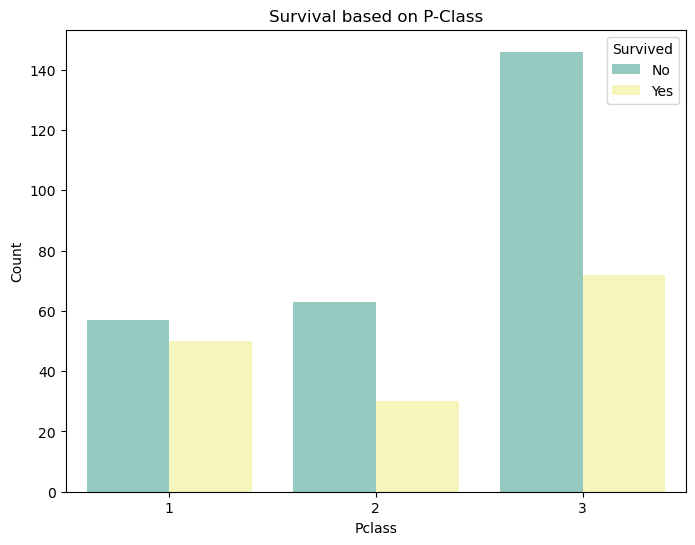

In [133]:
#class distribution and survival
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Pclass', hue='Survived', palette="Set3")
plt.title("Survival based on P-Class")
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

### data cleaning

In [134]:
#reducing the number of records that are non=important
titanic["Kin"]=titanic["SibSp"] + titanic["Parch"]
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Kin
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [135]:
# Dropping non essential coclumn as it has too many null values and not essential for survival prediction
data=titanic.drop(["SibSp","Parch"], axis=1, inplace=False)
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Kin
0,892,0,3,"Kelly, Mr. James",male,34.5,330911,7.8292,NaN,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,363272,7.0000,NaN,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,240276,9.6875,NaN,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,315154,8.6625,NaN,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,3101298,12.2875,NaN,S,2


### analysing data for training

In [136]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Kin
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188,0.839713
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576,1.519072
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,10.000000


In [137]:
titanic.groupby('Sex')[['Survived', 'Pclass', 'Age', 'Kin', 'Fare']].mean()

,Survived,Pclass,Age,Kin,Fare
Sex,,,,,
female,1.0,2.144737,30.272362,1.164474,49.747699
male,0.0,2.334586,30.272732,0.654135,27.527877


In [138]:
titanic.Survived.value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [139]:
#splitting data into train and test
X = titanic.drop('Survived', axis = 1)
y = titanic['Survived']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
train_data = pd.concat([X_train,y_train], axis = 1)
test_data = pd.concat([X_test,y_test], axis = 1)

In [141]:
train_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Kin,Survived
20,912,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,NaN,C,1,0
306,1198,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S,3,0
142,1034,1,"Ryerson, Mr. Arthur Larned",male,61.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,4,0
14,906,1,"Chaffee, Mrs. Herbert Fuller (Carrie Constance...",female,47.0,1,0,W.E.P. 5734,61.1750,E31,S,1,1
284,1176,3,"Rosblom, Miss. Salli Helena",female,2.0,1,1,370129,20.2125,NaN,S,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,1215,1,"Rowe, Mr. Alfred G",male,33.0,0,0,113790,26.5500,NaN,S,0,0
192,1084,3,"van Billiard, Master. Walter John",male,11.5,1,1,A/5. 851,14.5000,NaN,S,2,0
117,1009,3,"Sandstrom, Miss. Beatrice Irene",female,1.0,1,1,PP 9549,16.7000,G6,S,2,1
47,939,3,"Shaughnessy, Mr. Patrick",male,NaN,0,0,370374,7.7500,NaN,Q,0,0


In [146]:
import statsmodels.api as sm

In [149]:
formula = 'Survived ~ Pclass + Sex+ Age + SibSp + Parch + Fare + Embarked + Kin'
log_reg = sm.formula.logit(formula,data = train_data).fit()
log_reg.summary()

         Current function value: 0.000000
         Iterations: 35


C:\Users\prasanna\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\prasanna\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\prasanna\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\prasanna\anaconda\Lib\site-packages\statsmodels\discrete\discrete_model.py:227: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
C:\Users\prasann

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  269
Model:                          Logit   Df Residuals:                      260
Method:                           MLE   Df Model:                            8
Date:                Thu, 26 Oct 2023   Pseudo R-squ.:                   1.000
Time:                        01:23:51   Log-Likelihood:            -6.1986e-06
converged:                      False   LL-Null:                       -175.28
Covariance Type:            nonrobust   LLR p-value:                 6.873e-71
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        24.6450   7256.774      0.003      0.997   -1.42e+04    1.42e+04
Sex[T.male]     -42.2118   4627.982     -0.009      0.993   -9112.889    9028.466
Embarked[T.Q]     8.4820   4382.114      0.002      0.998   -8580.304    8597.268
Embarked[T.S]     2.1392   2651.600      0.001      0.999   -5194.901    5199.180
Pclass           -2.2207   1880.963     -0.001      0.999   -3688.840    3684.399
Age              -0.0582     79.814     -0.001      0.999    -156.490     156.373
SibSp             1.1561        nan        nan        nan         nan         nan
Parch            -1.0368        nan        nan        nan         nan         nan
Fare             -0.0048      8.634     -0.001      1.000     -16.927      16.917
Kin               0.1193        nan        nan        nan         nan         nan
=================================================================================

Complete Separation: The results show that there iscomplete separation or perfect prediction.
In this case the Maximum Likelihood Estimator does not exist and the parameters
are not identified.
"""

In [152]:
pred_test = log_reg.predict(X_test)
test_data['test_pred_class'] = [1 if x >= 0.5 else 0 for x in pred_test]
pred_train = log_reg.predict(X_train)
train_data['train_pred_class'] = [1 if x >= 0.5 else 0 for x in pred_train]

In [155]:
test_data_cm = confusion_matrix(test_data['Survived'], test_data['test_pred_class'])
train_data_cm = confusion_matrix(train_data['Survived'], train_data['train_pred_class'])
print('Train Data Confusion Matrix--> \n',train_data_cm )
print('Test Data Confusion Matrix--> \n',test_data_cm )

Train Data Confusion Matrix--> 
 [[221   0]
 [ 17  96]]
Test Data Confusion Matrix--> 
 [[45  0]
 [ 8 31]]


In [156]:
## Train and test accuracy report

print('Train Data Accuracy Report--> \n',classification_report(train_data['Survived'], train_data['train_pred_class']))
print('Test Data Accuracy Report--> \n',classification_report(test_data['Survived'], test_data['test_pred_class']))

Train Data Accuracy Report--> 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96       221
           1       1.00      0.85      0.92       113

    accuracy                           0.95       334
   macro avg       0.96      0.92      0.94       334
weighted avg       0.95      0.95      0.95       334

Test Data Accuracy Report--> 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92        45
           1       1.00      0.79      0.89        39

    accuracy                           0.90        84
   macro avg       0.92      0.90      0.90        84
weighted avg       0.92      0.90      0.90        84



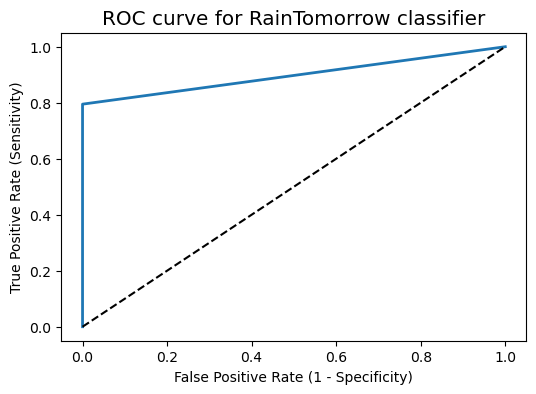

In [161]:
# plot ROC Curve


fpr, tpr, thresholds = roc_curve(test_data['Survived'], test_data['test_pred_class'], pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()